# K-means with sklearn

K-means doesn't need to be trained as a classification, regression, or recommendation algorithm; therefore, we don't need to use the fit and then predict methods. 

Instead, we can directly call the ``fit_predict`` method, which does all the work and returns an array with the cluster for each data point.

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [ ]:
model = KMeans(n_clusters=10)
clusters = model.fit_predict()
model

After we fit_predict the model, we can access several attributes from the model object:

model.inertia_: the inertia resulting from the clusters split.

model.cluster_centers_: the coordinates of the final centroids.

model.n_iter_: the number of iterations necessary to converge into the resulting clusters.

model.n_features_in_: the number of features passed to the model.

model.feature_names_in_: the name of the features passed to the model.

In [2]:
import pandas as pd
from sklearn.cluster import KMeans


cols_to_keep = ['Annual Income', 'Spending Score']
customers = pd.read_csv('mall_customers.csv')

model = KMeans(n_clusters=5)
clusters = model.fit_predict(customers[cols_to_keep])

print(clusters)
print("Number of iterations:",model.n_iter_)
print("Inertia:",model.inertia_)
print("The coordinates of the final centroids:",model.cluster_centers_)
print("Number of features passed to the model:", model.n_features_in_)
print("The name of features passed to the model:", model.feature_names_in_)

C:\Users\to_fi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\to_fi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 2 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 4 3 4 2 4 3 4 3 4 2 4 3 4 3 4 3 4 3 4 2 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4]
Number of iterations: 9
Inertia: 44448.45544793371
The coordinates of the final centroids: [[25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [86.53846154 82.12820513]]
Number of features passed to the model: 2
The name of features passed to the model: ['Annual Income' 'Spending Score']


# The Elbow Rule with Scikit-Learn

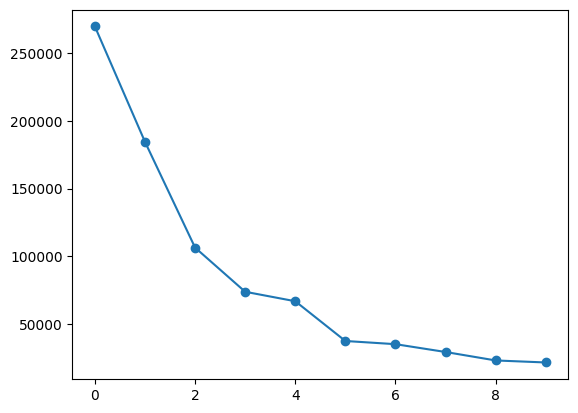

[269981.28, 184609.98434090614, 106348.3730621112, 73679.78903948834, 66674.36000494967, 37265.86520484346, 34907.510069930075, 29114.982287331222, 22865.86383508733, 21367.85314239332]


In [6]:
cols_to_keep = ['Annual Income', 'Spending Score']

def plot_elbow_curve(df,max_clusters=10):
    inertias = []
    #It loops from one to max_clusters
    for i in range(1,max_clusters+1):
        
        #It instantiates a KMeans object with a new n_clusters value.
        model = KMeans(n_clusters = i)
        cluster = model.fit_predict(df)
        
        #it appends model.inertia_ to the inertias list.
        inertias.append(model.inertia_)
        
    #After, the loop, use the inertias list to plot the Elbow Curve.
    plt.plot(range(max_clusters),inertias,marker='o')
    plt.show()
    
    return inertias

#Call the function for the same two variables of the DataFrame. Assign the result back to inertias and print it.

inertias = plot_elbow_curve(customers[cols_to_keep])
print(inertias)


# Column Scale

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

df_scaled = scaler.transform(df)

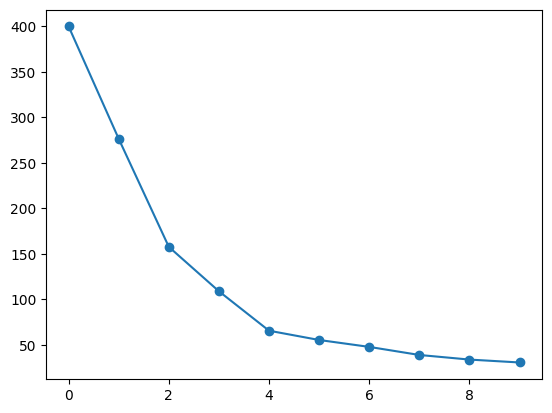

[400.00000000000006, 276.4487807383272, 157.70400815035944, 108.92131661364357, 65.57885579985047, 55.37734615765335, 47.783752912905065, 38.91329748007445, 33.85410621736368, 30.661247427107046]


In [12]:
from sklearn.preprocessing import StandardScaler


cols_to_keep = ['Annual Income', 'Spending Score']

def scaler(df):
    scaler = StandardScaler() #z-score scaler
    scaler.fit(df)
    df_scaled = scaler.transform(df)
    
    return df_scaled

scaled_customers = scaler(customers[cols_to_keep])
inertias = plot_elbow_curve(scaled_customers)
print(inertias)

#  Multivariate K-Means

4 columns
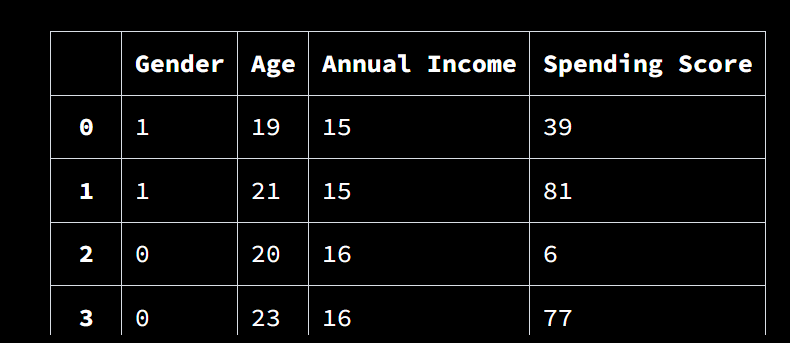

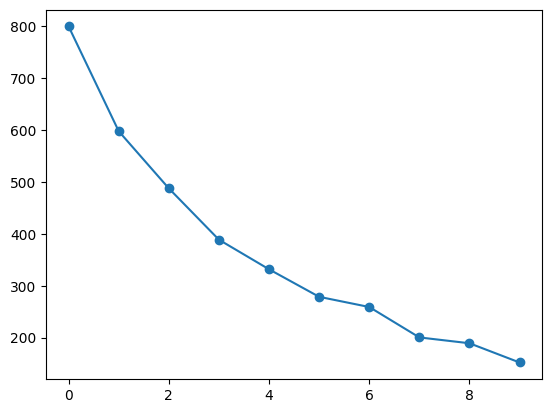

[799.9999999999998, 597.947293793228, 487.76026597908304, 388.76543428414726, 331.716067592917, 278.6481100060181, 259.00809980883014, 200.3561030828599, 189.10005309077448, 152.02983429775688]


In [11]:
customers_modif = customers.copy()
customers_modif = customers_modif.drop(['CustomerID'],axis=1)

#Male 1 - Female 0
customers_modif['Gender'] = customers_modif['Gender'].map({'Male' : 1, 'Female' : 0})

#Scaling
scaler = StandardScaler()
scaler.fit(customers_modif)
scaled_customers = scaler.transform(customers_modif)

inertias = plot_elbow_curve(scaled_customers)
print(inertias)

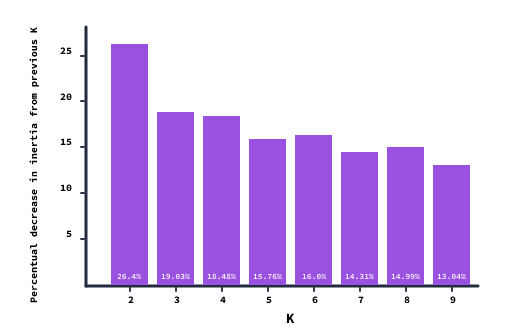

In [13]:
scaled_customers = scaler(customers_modif)

model = KMeans(n_clusters=6)
clusters = model.fit_predict(scaled_customers)
#KMeans model returns cluster 0 - we should transform to 1
customers['Cluster'] = clusters+1

print(customers['Cluster'].value_counts())

Cluster
6    41
4    38
1    35
2    34
5    29
3    23
Name: count, dtype: int64


# Interpreting Results — Numerical Variables

We have segmented the data on the previous screen, and we can see three clusters have a very similar number of occurrences while the other three are a bit smaller.

Cluster 1 has, on average, a very high income.

Cluster 5 has, on average, the youngest clients.


m


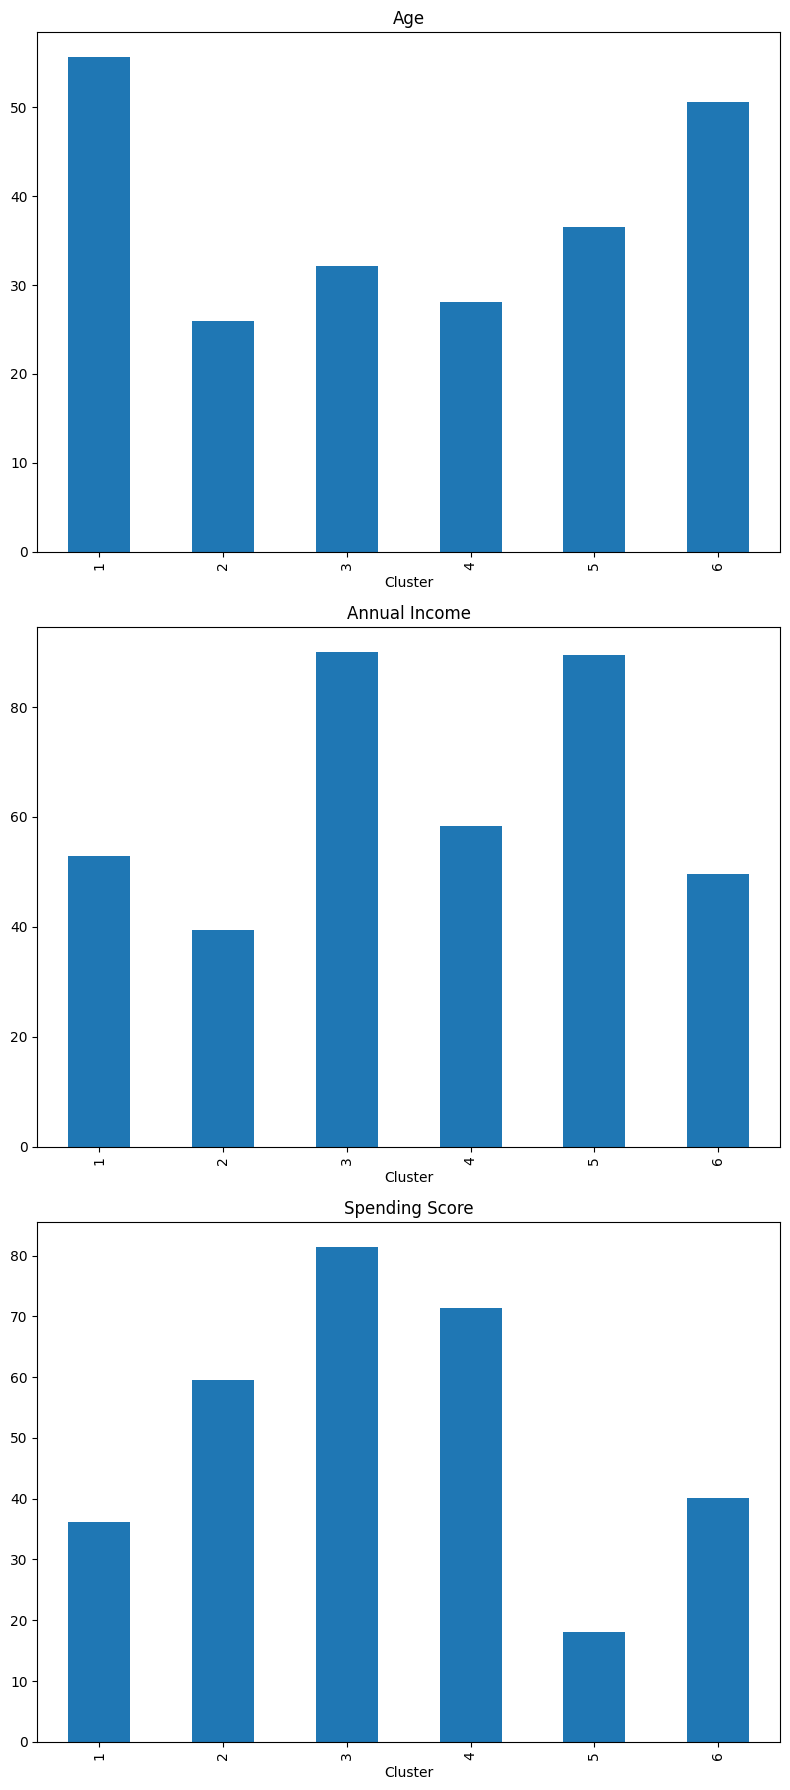

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['Age', 'Annual Income', 'Spending Score']
print('m')
mean_columns = {}

for n in numeric_columns:
    mean_columns[n] = customers.groupby('Cluster')[n].mean()

# Convert the dictionary to a DataFrame for better readability
mean_columns_df = pd.DataFrame(mean_columns)

fig, axes = plt.subplots(nrows=len(mean_columns_df.columns), ncols=1, figsize=(8, 6*len(mean_columns_df.columns)))
for i, column in enumerate(mean_columns_df.columns):
    mean_columns_df[column].plot(kind='bar', ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()



## Conclusion

The conclusions from the previous screen enable us to understand each cluster and then use them to make business decisions. For instance, customers in cluster 6 have a very high income but the lowest spending score. This means that they could've spent more money in our company.'''

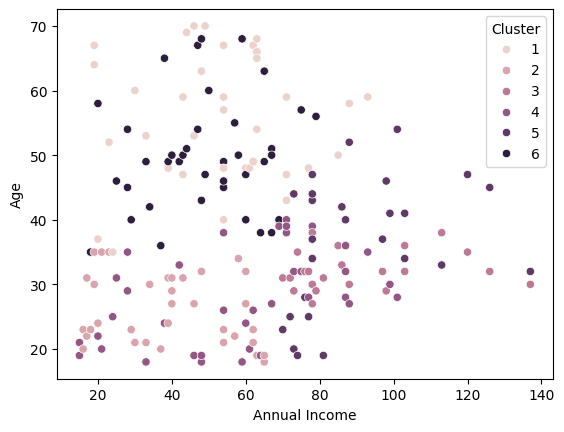

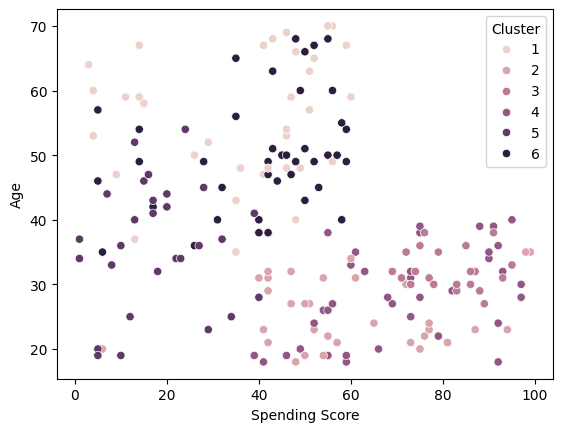

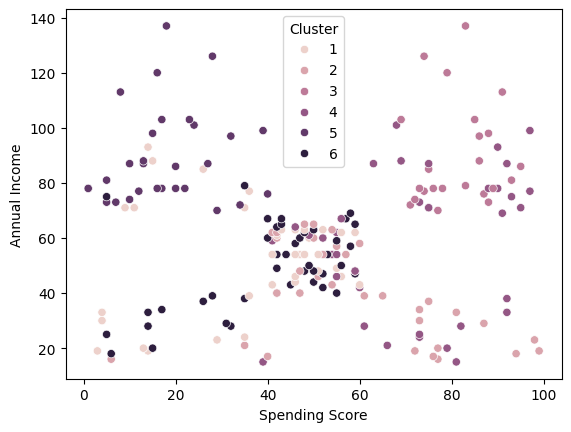

In [ ]:
# Plust clusters
sns.scatterplot(data=customers,x='Annual Income',y='Age',hue='Cluster')

plt.show()


sns.scatterplot(data=customers, x='Spending Score', y='Age',hue='Cluster')

plt.show()
sns.scatterplot(data=customers, x='Spending Score',y='Annual Income',hue='Cluster')


plt.show()

# Categorical Columns
So, now we need to understand how the categorical column Gender impacts the cluster split. Is the cluster with customers from only one gender? Are any clusters equally divided between men and women?


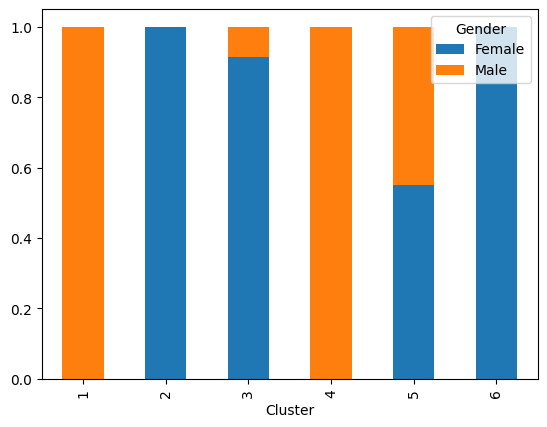

In [16]:
plot_df = pd.crosstab(
  index=customers['Cluster'], columns=customers['Gender'],
  values=customers['Gender'], aggfunc='size', normalize='index'
)

plot_df.plot(kind='bar',stacked=True)
plt.show()